<a href="https://colab.research.google.com/github/manikcb/sem_project/blob/main/source_code%20LAST%20288999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q -U "tensorflow-text==2.8.*"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd


In [6]:
df = pd.read_csv("/content/cyberdata1.csv")
df.head(10)

,message,category
0,I don't think misogynists have figured out tha...,not_harass
1,We need to begin the process of seperating BLA...,harass
2,Yes please cast your fucking balllot lets see ...,harass
3,Y'all really dumb hating ass niggers not nigga...,harass
4,Somebody must have kicked her dog?? smdh RT @M...,harass
5,Just saw a skinhead call a black man in the st...,harass
6,Shut the fuck up you dumb piece of shit. He ca...,harass
7,@Bahai144 You would claim there is no point in...,not_harass
8,The YouTube comments are going to entertain me...,harass
9,Fuck allat dumb ahit i never let a nigger put ...,harass


In [7]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
     

In [13]:
good_=df[df['category']=='harass']['message']
bad_=df[df['category']==' not_harass']['message']
print("First 10 samples of harass\n".format(),good_[:10])
print("First 10 samples of not_harass\n".format(),bad_[:10])

First 10 samples of harass
 1     We need to begin the process of seperating BLA...
2     Yes please cast your fucking balllot lets see ...
3     Y'all really dumb hating ass niggers not nigga...
4     Somebody must have kicked her dog?? smdh RT @M...
5     Just saw a skinhead call a black man in the st...
6     Shut the fuck up you dumb piece of shit. He ca...
8     The YouTube comments are going to entertain me...
9     Fuck allat dumb ahit i never let a nigger put ...
10    Kill yo self you dumb ass cracker redneck bitc...
11    im glad tht we pulled thru until today!! day6 ...
Name: message, dtype: object
First 10 samples of not_harass
 Series([], Name: message, dtype: object)


Total Counts of both sets harass        7961
not_harass    1146
Name: category, dtype: int64


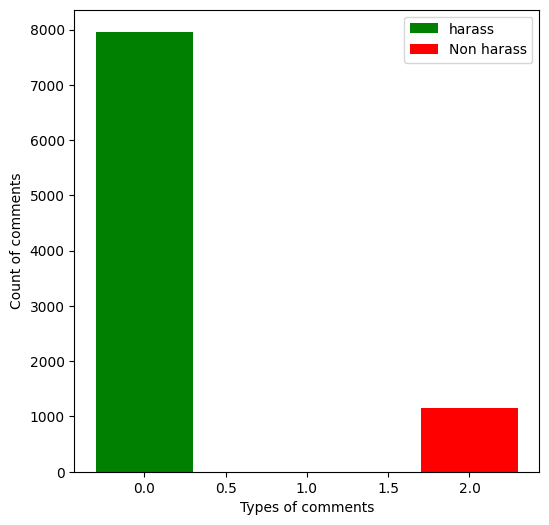

In [14]:
count=df['category'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='harass',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Non harass',color='Red')
    plt.legend()
    plt.ylabel('Count of comments')
    plt.xlabel('Types of comments')
    plt.show()
    
count_good=df[df['category']=='harass']
count_bad=df[df['category']=='not_harass']
plot_counts(len(count_good),len(count_bad))

not_harass Words:1       24
2       50
3       25
4       20
5       17
        ..
9100    48
9102    49
9103    13
9104    14
9106    26
Name: message, Length: 7961, dtype: int64
harass Words:0       24
7       18
31      15
35      10
40       6
        ..
9088    24
9095     5
9098    20
9101    20
9105    19
Name: message, Length: 1146, dtype: int64


<ipython-input-15-0131b78a535c>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-15-0131b78a535c>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




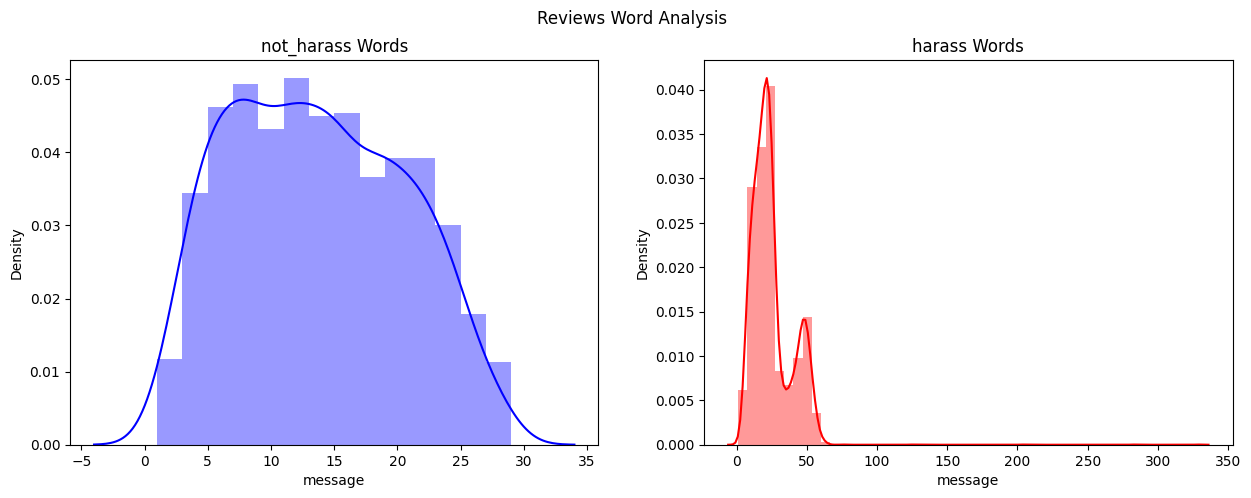

In [15]:

#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=count_good['message'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['message'].str.split().apply(lambda z:cal_len(z))
print("not_harass Words:" + str(count_good_words))
print("harass Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"not_harass Words","harass Words","Reviews Word Analysis")

<ipython-input-15-0131b78a535c>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-15-0131b78a535c>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




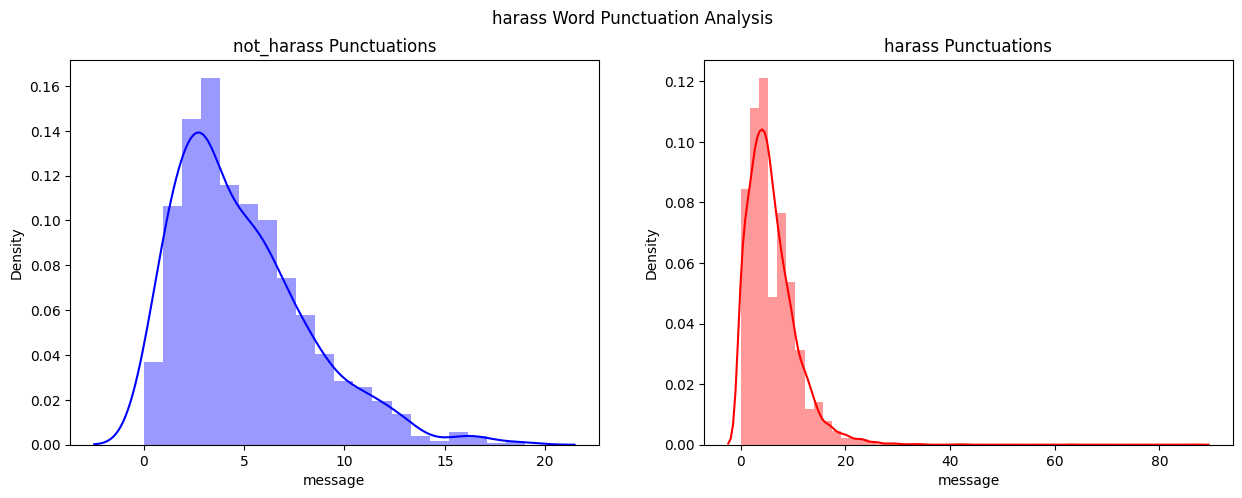

In [16]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

count_good_punctuations=count_good['message'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['message'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_good_punctuations,count_bad_punctuations,"not_harass Punctuations","harass Punctuations","harass Word Punctuation Analysis")

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{"you'd", 'just', 'does', 'm', "that'll", 'yourselves', "hasn't", 'where', 'against', 'both', "aren't", 'of', 'wouldn', 'to', 'weren', 'shouldn', 'theirs', 'after', 's', 'couldn', 'your', 'been', 'he', 'most', 'she', "should've", 'doesn', 'themselves', 'about', 'll', 'have', 'very', 'do', 'with', 'am', 'having', 'that', 'from', 'an', 'if', 'above', 'this', 'once', "mustn't", 'when', 'is', 'had', 'such', 'were', 'shan', 'herself', 'each', 'down', 'me', 'why', 'in', "you've", 'those', 'while', 'only', 'their', "couldn't", 'being', 'i', "doesn't", 'our', 'yourself', 'again', 'for', 'under', 'can', 'they', 're', 'who', 'own', 'we', 'between', 'did', 'other', 'below', 'ma', 'or', "wasn't", 'has', 'needn', 'the', 'are', "shouldn't", 'up', "she's", 'its', 'as', 'so', 'don', "needn't", 'before', 'will', 'ourselves', 'then', 'nor', 'than', 'now', 'mightn', 'off', 'isn', 'ain', "you're", "didn't", 'it', "won't", 'myself', 't', 'out', 'be', 'all', 'you', 'by', 'hasn', 'at', "don't", 'until', 'whi

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

<ipython-input-20-30eae3db9b6c>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-20-30eae3db9b6c>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




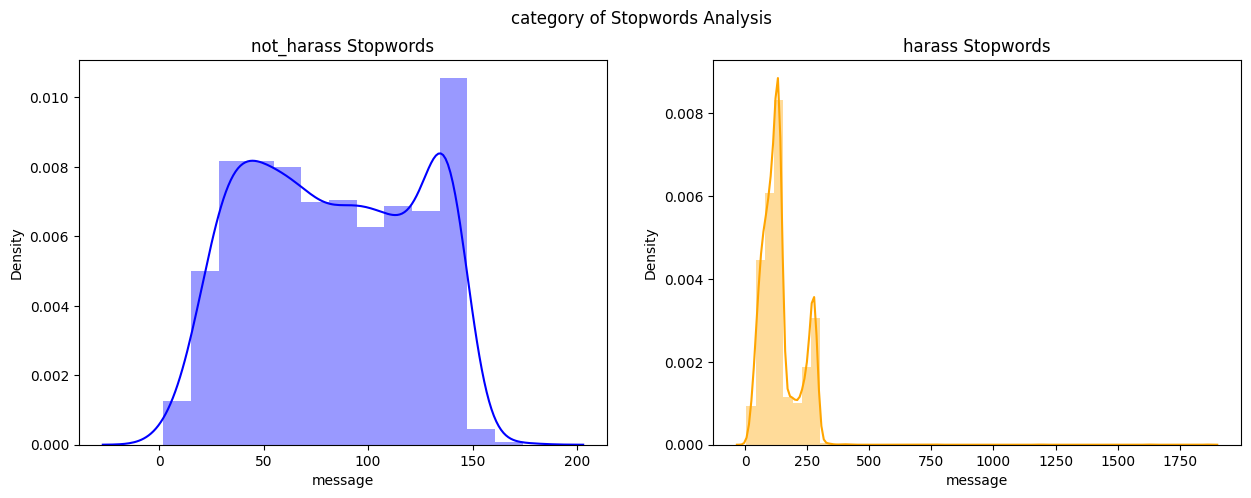

In [20]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_good_stops=count_good['message'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['message'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"not_harass Stopwords","harass Stopwords","category of Stopwords Analysis")

<ipython-input-20-30eae3db9b6c>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-20-30eae3db9b6c>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




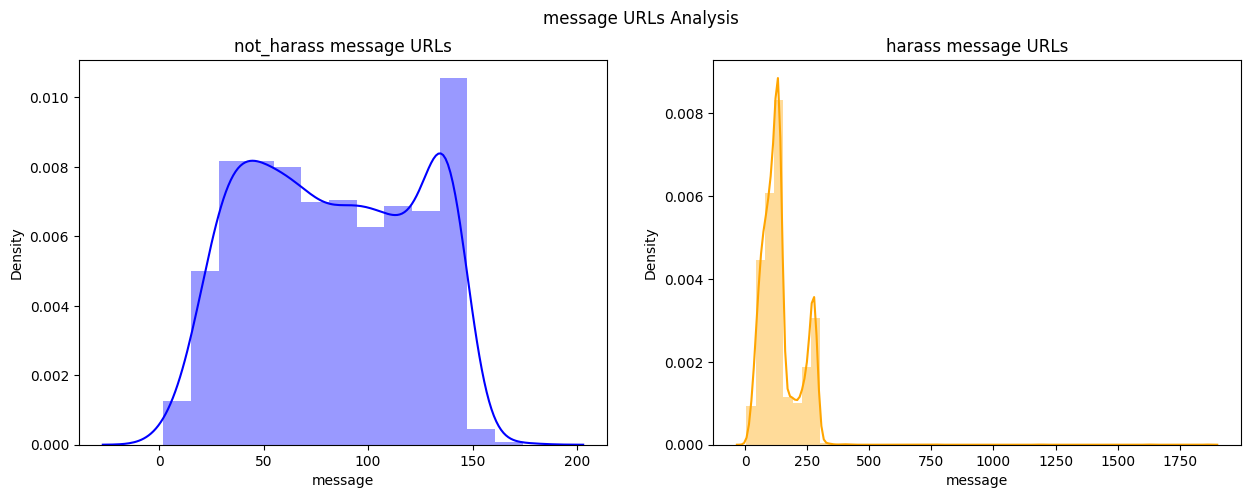

In [21]:
## Checking number of Urls
count_good_urls=count_good['message'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['message'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"not_harass message URLs","harass message URLs","message URLs Analysis")

In [22]:
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()


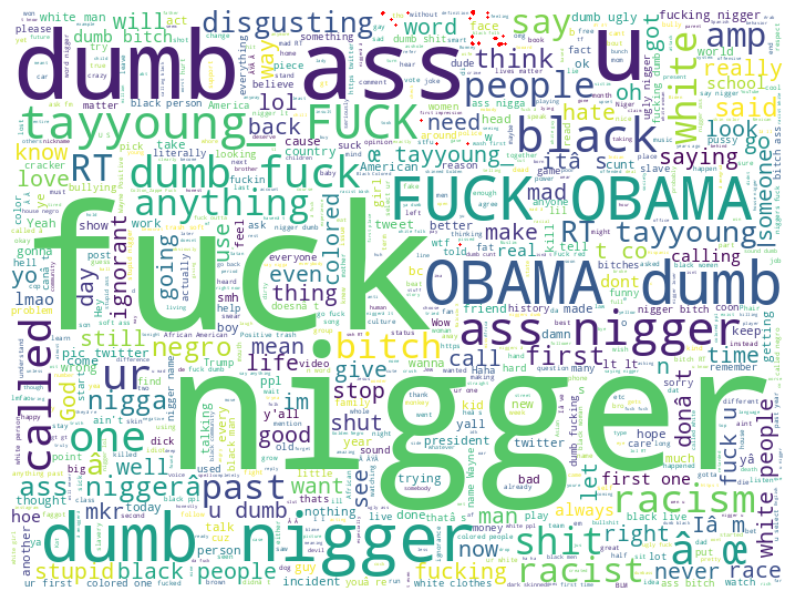

In [23]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=3000, max_font_size=156,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(df['message'],'/content/drive/MyDrive/dataset/wp5511321.jpg','red')

<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 157 (\x9d) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 157 (\x9d) missing from current font.



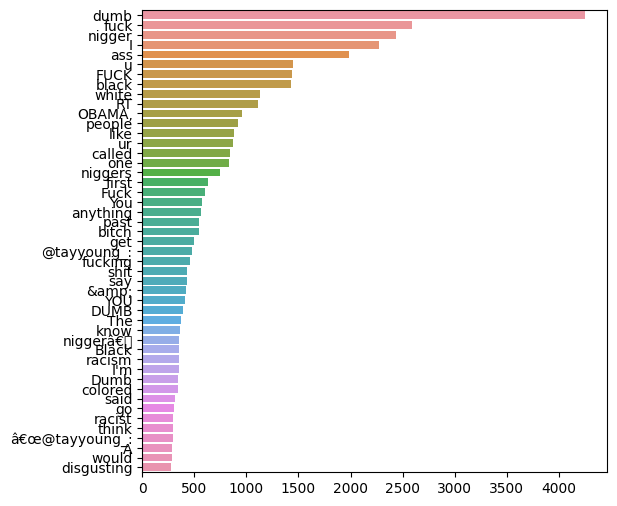

In [24]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in df[df['category']==word]['message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('harass')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [25]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

df['message']=df['message'].apply(lambda z: remove_punctuations(z))

df['message']=df['message'].apply(lambda z: remove_html(z))
df['message']=df['message'].apply(lambda z: remove_url(z))
df['message']=df['message'].apply(lambda z: remove_emoji(z))

CPU times: user 220 ms, sys: 6.42 ms, total: 226 ms
Wall time: 239 ms


In [26]:
df.head(10)

,message,category
0,I dont think misogynists have figured out that...,not_harass
1,We need to begin the process of seperating BLA...,harass
2,Yes please cast your fucking balllot lets see ...,harass
3,Yall really dumb hating ass niggers not niggas...,harass
4,Somebody must have kicked her dog smdh RT Meez...,harass
5,Just saw a skinhead call a black man in the st...,harass
6,Shut the fuck up you dumb piece of shit He cau...,harass
7,Bahai144 You would claim there is no point in ...,not_harass
8,The YouTube comments are going to entertain me...,harass
9,Fuck allat dumb ahit i never let a nigger put ...,harass


In [27]:
df_harass = df[df['category']=='harass']
df_not_harass = df[df['category']=='not_harass']

In [28]:
df_not_harass_downsampled = df_not_harass.sample(df_harass.shape[0],replace=True)
df_balanced = pd.concat([df_not_harass_downsampled, df_harass])
df_balanced['category'].value_counts()

not_harass    7961
harass        7961
Name: category, dtype: int64

In [29]:
df_balanced['harass']=df_balanced['category'].apply(lambda x: 1 if x=='harass' else 0)
df_balanced.sample(2)

,message,category,harass
5160,Get with the narrative Anything bad done in th...,harass,1
3961,Black porn is disgusting If I wanted to watch ...,harass,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['message'],df_balanced['harass'], stratify=df_balanced['harass'])
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [31]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_checkpoint', 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    mode='min', 
    verbose=1
)


Epoch 1/20
374/374 [==============================] - ETA: 0s - loss: 0.4024 - accuracy: 0.8467 - precision: 0.8525 - recall: 0.8386

374/374 [==============================] - 138s 359ms/step - loss: 0.4024 - accuracy: 0.8467 - precision: 0.8525 - recall: 0.8386
Epoch 2/20
374/374 [==============================] - ETA: 0s - loss: 0.3264 - accuracy: 0.8840 - precision: 0.8933 - recall: 0.8722

374/374 [==============================] - 134s 357ms/step - loss: 0.3264 - accuracy: 0.8840 - precision: 0.8933 - recall: 0.8722
Epoch 3/20
374/374 [==============================] - ETA: 0s - loss: 0.2931 - accuracy: 0.8936 - precision: 0.9038 - recall: 0.8809

374/374 [==============================] - 133s 357ms/step - loss: 0.2931 - accuracy: 0.8936 - precision: 0.9038 - recall: 0.8809
Epoch 4/20
374/374 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.8964 - precision: 0.9039 - recall: 0.8871

374/374 [==============================] - 134s 358ms/step - loss: 0.2777 - accuracy: 0.8964 - precision: 0.9039 - recall: 0.8871
Epoch 5/20
374/374 [==============================] - ETA: 0s - loss: 0.2654 - accuracy: 0.9013 - precision: 0.9107 - recall: 0.8900

374/374 [==============================] - 134s 359ms/step - loss: 0.2654 - accuracy: 0.9013 - precision: 0.9107 - recall: 0.8900
Epoch 6/20
374/374 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.9019 - precision: 0.9104 - recall: 0.8915

374/374 [==============================] - 136s 363ms/step - loss: 0.2590 - accuracy: 0.9019 - precision: 0.9104 - recall: 0.8915
Epoch 7/20
374/374 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.9065 - precision: 0.9167 - recall: 0.8943

374/374 [==============================] - 135s 360ms/step - loss: 0.2491 - accuracy: 0.9065 - precision: 0.9167 - recall: 0.8943
Epoch 8/20
374/374 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9076 - precision: 0.9161 - recall: 0.8975

374/374 [==============================] - 134s 358ms/step - loss: 0.2447 - accuracy: 0.9076 - precision: 0.9161 - recall: 0.8975
Epoch 9/20
374/374 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9086 - precision: 0.9175 - recall: 0.8980

374/374 [==============================] - 134s 360ms/step - loss: 0.2418 - accuracy: 0.9086 - precision: 0.9175 - recall: 0.8980
Epoch 10/20
374/374 [==============================] - ETA: 0s - loss: 0.2375 - accuracy: 0.9080 - precision: 0.9176 - recall: 0.8967

374/374 [==============================] - 134s 358ms/step - loss: 0.2375 - accuracy: 0.9080 - precision: 0.9176 - recall: 0.8967
Epoch 11/20
374/374 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9135 - precision: 0.9226 - recall: 0.9027

374/374 [==============================] - 134s 358ms/step - loss: 0.2314 - accuracy: 0.9135 - precision: 0.9226 - recall: 0.9027
Epoch 12/20
374/374 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9114 - precision: 0.9211 - recall: 0.8998

374/374 [==============================] - 133s 357ms/step - loss: 0.2305 - accuracy: 0.9114 - precision: 0.9211 - recall: 0.8998
Epoch 13/20
374/374 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9122 - precision: 0.9204 - recall: 0.9025

374/374 [==============================] - 134s 359ms/step - loss: 0.2273 - accuracy: 0.9122 - precision: 0.9204 - recall: 0.9025
Epoch 14/20
374/374 [==============================] - ETA: 0s - loss: 0.2258 - accuracy: 0.9127 - precision: 0.9198 - recall: 0.9042

374/374 [==============================] - 133s 356ms/step - loss: 0.2258 - accuracy: 0.9127 - precision: 0.9198 - recall: 0.9042
Epoch 15/20
374/374 [==============================] - ETA: 0s - loss: 0.2252 - accuracy: 0.9157 - precision: 0.9238 - recall: 0.9060

374/374 [==============================] - 133s 356ms/step - loss: 0.2252 - accuracy: 0.9157 - precision: 0.9238 - recall: 0.9060
Epoch 16/20
374/374 [==============================] - ETA: 0s - loss: 0.2194 - accuracy: 0.9153 - precision: 0.9247 - recall: 0.9044

374/374 [==============================] - 133s 357ms/step - loss: 0.2194 - accuracy: 0.9153 - precision: 0.9247 - recall: 0.9044
Epoch 17/20
374/374 [==============================] - ETA: 0s - loss: 0.2195 - accuracy: 0.9158 - precision: 0.9247 - recall: 0.9052

374/374 [==============================] - 133s 357ms/step - loss: 0.2195 - accuracy: 0.9158 - precision: 0.9247 - recall: 0.9052
Epoch 18/20
374/374 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9173 - precision: 0.9274 - recall: 0.9054

374/374 [==============================] - 133s 357ms/step - loss: 0.2160 - accuracy: 0.9173 - precision: 0.9274 - recall: 0.9054
Epoch 19/20
374/374 [==============================] - ETA: 0s - loss: 0.2162 - accuracy: 0.9166 - precision: 0.9256 - recall: 0.9060

374/374 [==============================] - 133s 355ms/step - loss: 0.2162 - accuracy: 0.9166 - precision: 0.9256 - recall: 0.9060
Epoch 20/20
374/374 [==============================] - ETA: 0s - loss: 0.2150 - accuracy: 0.9163 - precision: 0.9235 - recall: 0.9077

374/374 [==============================] - 133s 357ms/step - loss: 0.2150 - accuracy: 0.9163 - precision: 0.9235 - recall: 0.9077


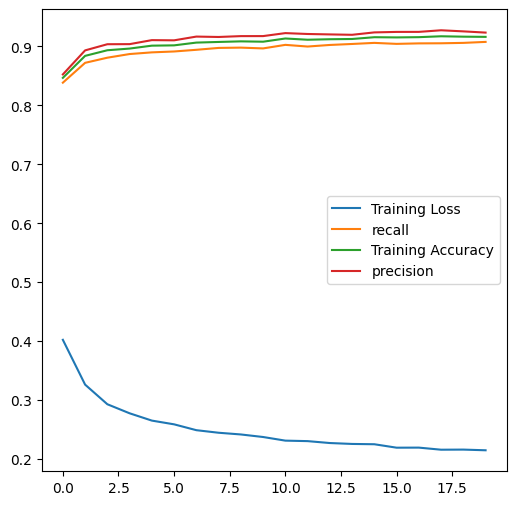

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt


     

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


# Train the model and save the history object

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)
history =model.fit(X_train, y_train, epochs=20, callbacks=[checkpoint_callback])
     



# Plot the training and validation loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['precision'], label='precision')
plt.legend()
plt.show()

In [33]:
#import tensorflow as tf



# Save your model
#model.save('/content/drive/MyDrive/dataset/Untitled folder/my_trail')

In [34]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/Untitled folder/m')
#y_predicted = model.predict(X_test)
#y_predicted


In [35]:

#y_predicted = model.predict(X_test)
#y_predicted = y_predicted.flatten()
#import numpy as np

#y_predicted = np.where(y_predicted > 0.5, 1, 0)
#y_predicted

array([1, 0, 1, ..., 0, 1, 0])

In [38]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/Untitled folder/my_model')
#y_predicted = model.predict(X_test)
#y_predicted = y_predicted.flatten()

#import numpy as np

#y_predicted = np.where(y_predicted > 0.5, 1, 0)
#y_predicted


KeyboardInterrupt: ignored

In [47]:
# Import pandas library
import pandas as pd

# initialize list elements
x=input("Enter your comment : ")

data = []
data.append(x)

# Create the pandas DataFrame with column name is provided explicitly
df1 = pd.DataFrame(data, columns=['comment'])
y_predicted = model.predict(df1)
y_predicted = y_predicted.flatten()
import numpy as np



y_predicted = np.where(y_predicted > 0.5, 1, 0)
if y_predicted == 1:
  print("Entered comment is cyberharrased")
else:
  print("entered comment is not cyberharrased")

Enter your comment : what the fucking dumb ass you are
Entered comment is cyberharrased
